# development work on "shifty"
 - 20191106
 - Helpful to have a notebook around for playing with functionality 

#### Reminder of the contents / types generated when reading a fits file with astropy ...

In [1]:
import astropy
from astropy.io import fits
import numpy as np 
import textwrap
import matplotlib.pyplot as plt

from astropy.time import Time
from astropy.units import allclose as quantity_allclose
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates.builtin_frames import FK5, ICRS, GCRS, GeocentricMeanEcliptic, BarycentricMeanEcliptic, HeliocentricMeanEcliptic, GeocentricTrueEcliptic, BarycentricTrueEcliptic, HeliocentricTrueEcliptic, HeliocentricEclipticIAU76
from astropy.constants import R_sun, R_earth


In [2]:
filepath = '/Users/matthewjohnpayne/.shifty_data/4/1/1/tess2018292095940-s0004-1-1-0124-s_ffic.fits'
obj = fits.open(filepath)
obj[0].header

SIMPLE  =                    T / conforms to FITS standards                     
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T / file contains extensions                       
NEXTEND =                    2 / number of standard extensions                  
EXTNAME = 'PRIMARY '           / name of extension                              
EXTVER  =                    1 / extension version number (not format version)  
SIMDATA =                    F / file is based on simulated data                
ORIGIN  = 'NASA/Ames'          / institution responsible for creating this file 
DATE    = '2018-11-14'         / file creation date.                            
TSTART  =    1410.917241951712 / observation start time in TJD                  
TSTOP   =    1410.938075279943 / observation stop time in TJD                   
DATE-OBS= '2018-10-19T09:59:

In [3]:
obj[1].header

XTENSION= 'IMAGE   '           / marks the beginning of a new HDU               
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / NAXIS                                          
NAXIS1  =                 2136 / length of first array dimension                
NAXIS2  =                 2078 / length of second array dimension               
PCOUNT  =                    0 / group parameter count (not used)               
GCOUNT  =                    1 / group count (not used)                         
INHERIT =                    T / inherit the primary header                     
EXTNAME = 'CAMERA.CCD 1.1 cal' / name of extension                              
EXTVER  =                    1 / extension version number (not format version)  
SIMDATA =                    F / file is based on simulated data                
TELESCOP= 'TESS    '           / telescope                                      
INSTRUME= 'TESS Photometer' 

In [4]:
obj[2].header

XTENSION= 'IMAGE   '           / marks the beginning of a new HDU               
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / NAXIS                                          
NAXIS1  =                 2136 / length of first array dimension                
NAXIS2  =                 2078 / length of second array dimension               
PCOUNT  =                    0 / group parameter count (not used)               
GCOUNT  =                    1 / group count (not used)                         
INHERIT =                    T / inherit the primary header                     
EXTNAME = 'CAMERA.CCD 1.1 uncert' / name of extension                           
EXTVER  =                    1 / extension version number (not format version)  
SIMDATA =                    F / file is based on simulated data                
TELESCOP= 'TESS    '           / telescope                                      
INSTRUME= 'TESS Photometer' 

In [5]:
np.shape(obj[0].data), np.shape(obj[1].data), np.shape(obj[2].data)

((), (2078, 2136), (2078, 2136))

In [6]:
obj[1].data, obj[2].data

(array([[ 0.18281528,  0.07671411,  0.1595356 , ...,  0.00712733,
          0.01205946,  0.01674499],
        [ 0.18610774,  0.1343039 ,  0.20602259, ...,  0.04289078,
          0.01402684, -0.02938142],
        [ 0.13516839,  0.11913346,  0.093174  , ...,  0.00564221,
         -0.01113253, -0.03579868],
        ...,
        [ 0.04355072,  0.09161711,  0.06145985, ..., -0.0552806 ,
         -0.07920694, -0.02321625],
        [ 0.06528474,  0.06574507,  0.03978013, ..., -0.14580718,
         -0.11916818, -0.07846712],
        [ 0.09491035,  0.04110625,  0.05460934, ..., -0.07082231,
         -0.10658576, -0.05404757]], dtype=float32),
 array([[0.03711468, 0.03711468, 0.03711468, ..., 0.03711468, 0.03711468,
         0.03711468],
        [0.03711468, 0.03711468, 0.03711468, ..., 0.03711468, 0.03711468,
         0.03711468],
        [0.03711468, 0.03711468, 0.03711468, ..., 0.03711468, 0.03711468,
         0.03711468],
        ...,
        [0.03711468, 0.03711468, 0.03711468, ..., 0.03711

In [7]:
print(
    np.percentile(obj[1].data, [0,25,50,75,100] ),
    '\n',
    np.percentile(obj[2].data, [0,25,50,75,100] )
)

[-2.22786808e+01  1.06697315e+02  1.16617645e+02  1.25683958e+02
  1.20802109e+05] 
 [0.         0.32722809 0.34137806 0.35581718 9.54742813]


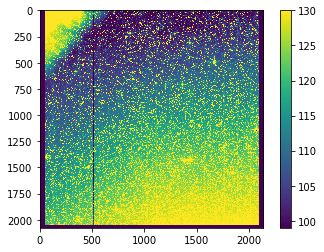

In [8]:
plt.imshow(obj[1].data, vmin=99.00, vmax=130.0)
plt.colorbar()


# Try using the methods and classes in "data" 

In [9]:
import data 

IndentationError: expected an indented block (data.py, line 111)

In [70]:
# create loader
T   = data.TESSImageLoader()
# generate test ImageDataSet 
IDS = T.get_image_data_set( file_spec_container='DEV' )

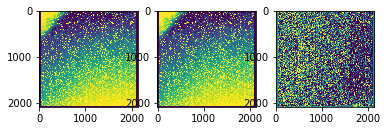

In [85]:
# plot some of the images 
fig, ax = plt.subplots(1, 3)
ax[0].imshow(IDS.images[0], vmin=99.00, vmax=130.0)
ax[1].imshow(IDS.images[9], vmin=99.00, vmax=130.0)
ax[2].imshow(IDS.images[9]-IDS.images[0], vmin=-0.50, vmax=0.50)


In [103]:
IDS.headers['cal'][0]['BJDREFI'], IDS.headers['cal'][0]['BJDREFF'], IDS.headers['cal'][0]['TSTART'], IDS.headers['cal'][0]['TSTOP']

(2457000, 0.0, 1410.922486838214, 1410.943320166445)

# Times ...

In [10]:
time    = Time([2458337.8283571, 2458338.8283571], format='jd', scale='tdb')
time, type(time), len(time)

(<Time object: scale='tdb' format='jd' value=[2458337.8283571 2458338.8283571]>,
 astropy.time.core.Time,
 2)

# Frames / Coords

In [11]:
ra = np.ones((4, ), dtype=float) * u.deg
dec = 2*np.ones((4, ), dtype=float) * u.deg
distance = np.ones((4, ), dtype=float) * u.au
test_icrs = ICRS(ra=ra, dec=dec, distance=distance)
bary_arr = test_icrs.transform_to(BarycentricMeanEcliptic)


In [12]:
ra, dec

(<Quantity [1., 1., 1., 1.] deg>, <Quantity [2., 2., 2., 2.] deg>)

In [13]:
test_icrs

<ICRS Coordinate: (ra, dec, distance) in (deg, deg, AU)
    [(1., 2., 1.), (1., 2., 1.), (1., 2., 1.), (1., 2., 1.)]>

In [14]:
bary_arr

<BarycentricMeanEcliptic Coordinate (equinox=J2000.000): (lon, lat, distance) in (deg, deg, AU)
    [(1.71306506, 1.43722201, 1.), (1.71306506, 1.43722201, 1.),
     (1.71306506, 1.43722201, 1.), (1.71306506, 1.43722201, 1.)]>